In [69]:
!pip install -Uqq ipdb
!pip install pandas matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [70]:
import ipdb
import statistics
import os
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from google.colab import files

In [ ]:
# download video-data

def upload_files_recursively(path, data, filter):
    for root, dirs, files in os.walk(path):
        for file in files:
            if filter(file):
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    jsonData = json.load(f)

                    jsonData['name'] = file

                    video_id = ''
                    try:
                      video_id = jsonData['video_id']
                    except:
                      print('    ERROR OCCURED: ' + file)
                      continue
                    # ipdb.set_trace(context=1)
                    print(video_id + ' : ' + file)
                    data.append(jsonData)

In [ ]:
FEDfilter = lambda file: file.endswith('.json') & file.startswith('watch')
FEDdata = []
resData = pd.DataFrame(columns=['id', 'time'])
upload_files_recursively('/content/data/', FEDdata, FEDfilter)

FEDdata = sorted(FEDdata, key=lambda a: a['name'])
print('-' * 32)
ids = []

for v in FEDdata:
  ids.append({ 'id':v['video_id'] })
  print(v['name'])

resData = pd.DataFrame(ids, columns=['id'])
resData = resData.set_index('id')

resData

31c8a776-ec36-4679-99c4-eefeed9a5604 : watchv=mCSWjVAju3U&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&index=35_31c8a776-ec36-4679-99c4-eefeed9a5604.json
d0676316-2956-42e7-b6a8-90277a62bbdd : watchv=q-Zw5jBfB8M&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&index=31_d0676316-2956-42e7-b6a8-90277a62bbdd.json
a8bef127-7fcc-4009-bfac-e31f46520e7d : watchv=FtCZIHWYoR4&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&index=36_a8bef127-7fcc-4009-bfac-e31f46520e7d.json
d1abc5e4-a2bb-4baf-b950-17865f4b568f : watchv=cwChTWU8hnA&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&index=38_d1abc5e4-a2bb-4baf-b950-17865f4b568f.json
f946b729-a4b6-4358-971b-55835e585cda : watchv=4MCcx_ZsqJU&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&index=40_f946b729-a4b6-4358-971b-55835e585cda.json
840207c0-702c-482e-aef2-903a5f0970fb : watchv=BivvfOofwiE&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&index=39_840207c0-702c-482e-aef2-903a5f0970fb.json
61899012-04de-42cc-8af0-80bd3ce99cb4 : watchv=EO0ngv_oLIg&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&i

""
id
f946b729-a4b6-4358-971b-55835e585cda
840207c0-702c-482e-aef2-903a5f0970fb
61899012-04de-42cc-8af0-80bd3ce99cb4
a8bef127-7fcc-4009-bfac-e31f46520e7d
d1abc5e4-a2bb-4baf-b950-17865f4b568f
06897558-d0b4-4cbf-b57a-5faf070fed30
31c8a776-ec36-4679-99c4-eefeed9a5604
d0676316-2956-42e7-b6a8-90277a62bbdd
3e729fc5-b42e-42c8-8a88-07da3f672704


In [ ]:
# reading timeframes

In [ ]:

filtered = [x for x in FEDdata if x['video_id'] == 'f946b729-a4b6-4358-971b-55835e585cda'][0]
filtered['emotions']


tfs = [x for x in filtered['emotions'][0]['video']]
tfdata = pd.DataFrame(tfs)
tfdata

,video_path,time_sec,video_anger,video_neutral,video_happiness
0,upload_file/f946b729-a4b6-4358-971b-55835e585c...,20,0.357447,0.331826,0.310727
1,upload_file/f946b729-a4b6-4358-971b-55835e585c...,30,0.368085,0.324161,0.307754
2,upload_file/f946b729-a4b6-4358-971b-55835e585c...,40,0.354576,0.335029,0.310395
3,upload_file/f946b729-a4b6-4358-971b-55835e585c...,50,0.360745,0.329174,0.310081
4,upload_file/f946b729-a4b6-4358-971b-55835e585c...,60,0.360367,0.331267,0.308366
...,...,...,...,...,...
283,upload_file/f946b729-a4b6-4358-971b-55835e585c...,3380,0.372495,0.317642,0.309863
284,upload_file/f946b729-a4b6-4358-971b-55835e585c...,3390,0.371603,0.317468,0.310929
285,upload_file/f946b729-a4b6-4358-971b-55835e585c...,3400,0.374532,0.315754,0.309715
286,upload_file/f946b729-a4b6-4358-971b-55835e585c...,3410,0.357652,0.325668,0.316680


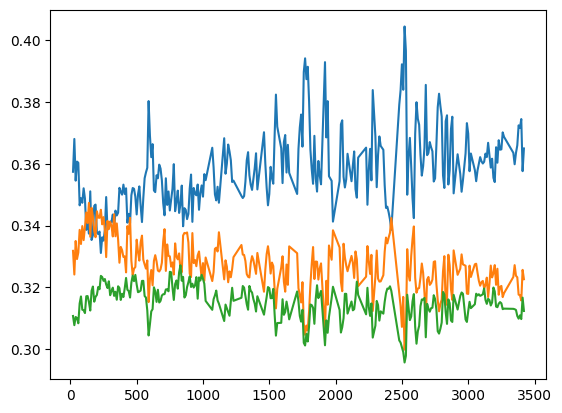

In [ ]:
filTfdata = tfdata[tfdata['video_anger'] != 0]

plt.plot(filTfdata['time_sec'], filTfdata['video_anger'])
plt.plot(filTfdata['time_sec'], filTfdata['video_neutral'])
plt.plot(filTfdata['time_sec'], filTfdata['video_happiness'])

plt.show()

In [ ]:
# confidence

for video in FEDdata:
  values = []
  conf = video['confidence']
  id = video['video_id']

  if conf is not None:
    for piece in conf:
      try:
        values.append(float(piece['confidence']))
      except:
        print('Error value: ' + piece['confidence'] + ' | id: ' + id)
  else:
    print('there is none')

  if len(values) > 0:
    resData.loc[id, 'conf_avg'] = sum(values) / len(values)
    resData.loc[id, 'conf_max'] = max(values)
    resData.loc[id, 'conf_min'] = min(values)
    resData.loc[id, 'conf_median'] = statistics.median(values)
  else:
    print('empty video: ' + id)

Error value: No face | id: 840207c0-702c-482e-aef2-903a5f0970fb
Error value: No face | id: 840207c0-702c-482e-aef2-903a5f0970fb
there is none
empty video: a8bef127-7fcc-4009-bfac-e31f46520e7d
Error value: No face | id: d1abc5e4-a2bb-4baf-b950-17865f4b568f
there is none
empty video: 31c8a776-ec36-4679-99c4-eefeed9a5604
there is none
empty video: 3e729fc5-b42e-42c8-8a88-07da3f672704


In [ ]:
# congruence

for video in FEDdata:
  values = []
  cngr = video['congruence']
  id = video['video_id']

  if cngr is not None:
    for piece in cngr:
      try:
        values.append(float(piece['congruence']))
      except:
        print('Error value: ' + piece['congruence'] + ' | id: ' + id)
  else:
    print('there is none')

  if len(values) > 0:
    resData.loc[id, 'cngr_avg'] = sum(values) / len(values)
    resData.loc[id, 'cngr_max'] = max(values)
    resData.loc[id, 'cngr_min'] = min(values)
    resData.loc[id, 'cngr_median'] = statistics.median(values)
  else:
    print('empty video: ' + id)

there is none
empty video: 31c8a776-ec36-4679-99c4-eefeed9a5604


In [ ]:
# aggression

for video in FEDdata:
  values = []

  try:
    emotions = video['emotions'][0]
    agr_div = video['aggression_divided']
    agr_agg = video['aggression_aggregated']
  except Exception as e:
    print(f'aggression. videoId = {video["video_id"]} Exception: {e}')

  id = video['video_id']

  emotions_video_anger_vals = []
  emotions_video_neutral_vals = []
  emotions_video_happiness_vals = []

  emotions_audio_anger_vals = []
  emotions_audio_neutral_vals = []
  emotions_audio_happiness_vals = []

  emotions_text_anger_vals = []
  emotions_text_neutral_vals = []
  emotions_text_happiness_vals = []

  if emotions is not None:
    for piece in emotions['video']:
      try:
        emotions_video_anger_vals.append(piece['video_anger'])
        emotions_video_neutral_vals.append(piece['video_neutral'])
        emotions_video_happiness_vals.append(piece['video_happiness'])
      except:
        print('Error value: ' + piece['congruence'] + ' | id: ' + id)


    for piece in emotions['audio']:
      try:
        emotions_audio_anger_vals.append(piece['audio_anger'])
        emotions_audio_neutral_vals.append(piece['audio_neutral'])
        emotions_audio_happiness_vals.append(piece['audio_happiness'])
      except:
        print('Error value: ' + piece['congruence'] + ' | id: ' + id)


    for piece in emotions['text']:
      try:
        emotions_text_anger_vals.append(piece['text_anger'])
        emotions_text_neutral_vals.append(piece['text_neutral'])
        emotions_text_happiness_vals.append(piece['text_happiness'])
      except:
        print('Error value: ' + piece['congruence'] + ' | id: ' + id)

  else:
    print('there is none')

  resData.loc[id, 'vid_anger_avg'] = sum(emotions_video_anger_vals) / len(emotions_video_anger_vals)
  resData.loc[id, 'vid_neutral_avg'] = sum(emotions_video_neutral_vals) / len(emotions_video_neutral_vals)
  resData.loc[id, 'vid_happiness_avg'] = sum(emotions_video_happiness_vals) / len(emotions_video_happiness_vals)

  resData.loc[id, 'aud_anger_avg'] = sum(emotions_audio_anger_vals) / len(emotions_audio_anger_vals)
  resData.loc[id, 'aud_neutral_avg'] = sum(emotions_audio_neutral_vals) / len(emotions_audio_neutral_vals)
  resData.loc[id, 'aud_happiness_avg'] = sum(emotions_audio_happiness_vals) / len(emotions_audio_happiness_vals)
  
  resData.loc[id, 'txt_anger_avg'] = sum(emotions_text_anger_vals) / len(emotions_text_anger_vals)
  resData.loc[id, 'txt_neutral_avg'] = sum(emotions_text_neutral_vals) / len(emotions_text_neutral_vals)
  resData.loc[id, 'txt_happiness_avg'] = sum(emotions_text_happiness_vals) / len(emotions_text_happiness_vals)

aggression. videoId = 31c8a776-ec36-4679-99c4-eefeed9a5604 Exception: 'NoneType' object is not subscriptable


In [ ]:
resData.describe()

,conf_avg,conf_max,conf_min,conf_median,cngr_avg,cngr_max,cngr_min,cngr_median,vid_anger_avg,vid_neutral_avg,vid_happiness_avg,aud_anger_avg,aud_neutral_avg,aud_happiness_avg,txt_anger_avg,txt_neutral_avg,txt_happiness_avg
count,6.000000,6.000000,6.000000,6.000000,8.000000,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.646158,0.659221,0.635722,0.645958,0.097592,0.158600,0.056519,0.096869,0.335181,0.340428,0.314965,0.373036,0.312028,0.314936,0.283545,0.447264,0.269191
std,0.001450,0.003359,0.000880,0.001654,0.008606,0.035491,0.005862,0.008575,0.016482,0.016966,0.006444,0.011943,0.006176,0.005859,0.004939,0.007011,0.002396
min,0.644762,0.656958,0.634600,0.644347,0.085680,0.117560,0.049157,0.086147,0.313597,0.323383,0.302762,0.353518,0.300084,0.303199,0.273941,0.435741,0.262918
25%,0.644894,0.657265,0.635080,0.644568,0.092783,0.137788,0.051788,0.091352,0.315500,0.328823,0.311786,0.365861,0.310193,0.313519,0.283057,0.445660,0.269476
50%,0.646010,0.657747,0.635758,0.645709,0.096586,0.146999,0.055248,0.096495,0.345281,0.336516,0.314165,0.373712,0.311777,0.316095,0.283617,0.446235,0.270149
75%,0.647061,0.659482,0.636372,0.646971,0.101989,0.173138,0.061428,0.101626,0.346592,0.349935,0.320633,0.374704,0.315941,0.318198,0.284045,0.447339,0.270233
max,0.648230,0.665711,0.636787,0.648405,0.110753,0.223152,0.065357,0.110291,0.354154,0.370335,0.322494,0.396717,0.322547,0.323935,0.293596,0.463141,0.270663


------------------------------------------------------------------

# Data preparation

In [ ]:
ticker = 'RTSI'

mrk = pd.read_csv('/content/market/RTSI_161216_161216.csv', sep=',')

rangedTime = mrk.loc[(mrk['<TIME>'] > 150000) & (mrk['<TIME>'] < 160000)]

divided_by_minute_Tfdata = filTfdata[filTfdata['time_sec'] % 60 == 0]
divided_by_minute_Tfdata = divided_by_minute_Tfdata.interpolate(method='linear', limit_direction='both')

for index, row in divided_by_minute_Tfdata.iterrows():

  minuteFromVideo = int(row['time_sec'] / 60)
  timeFromMkt = int(f'150{minuteFromVideo}00') if minuteFromVideo < 10 else int(f'15{minuteFromVideo}00')
  mktValueAtTimeDf = rangedTime.loc[(rangedTime['<TIME>'] == timeFromMkt)]['<CLOSE>']
  
  try:
    mktValueAtTime = float(mktValueAtTimeDf)
  except Exception as e:
    print(f'time_sec={row["time_sec"]} minuteFromVideo={minuteFromVideo} timeFromMkt={timeFromMkt} mktValueAtTimeDf={mktValueAtTimeDf}')
    print(e)
  # print(mktValueAtTime)

  divided_by_minute_Tfdata.loc[index, f'{ticker}-value'] = mktValueAtTime

## Model building

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# play with regreesion. Linear

# random data

X = divided_by_minute_Tfdata.drop(['RTSI-value', 'video_path'], axis=1).head(290)

y = divided_by_minute_Tfdata[['RTSI-value']].head(290)

# X = X.interpolate(method='linear', limit_direction='both')

to_predict = divided_by_minute_Tfdata.drop(['RTSI-value', 'video_path'], axis=1).tail(4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

print('-' * 40)
# # Make predictions
new_data = pd.DataFrame()
predictions = model.predict(to_predict)
print('Predictions:')
print(predictions)

Mean Squared Error: 0.3334225912558287
Mean Absolute Error: 0.5481557555123799
R-squared: 0.30825188536128734
----------------------------------------
Predictions:
[[1142.36105465]
 [1142.52430721]
 [1142.00154741]
 [1141.97057188]]
